In [ ]:
!pip install yfinance pycaret

In [ ]:
import pandas as pd
import yfinance as yf
from pycaret.time_series import TSForecastingExperiment

# Step 1: Fetch the data using yfinance
dat = yf.Ticker("SOXL")
df = dat.history(period='max')

# Step 2: Extract only the 'Open' column
open_data = df[['Open']]

# Step 3: Prepare the data for PyCaret
open_data.reset_index(inplace=True)
open_data.columns = ['Date', 'Open']

# Step 4: Initialize PyCaret Time Series Forecasting Experiment
exp = TSForecastingExperiment()
exp.setup(data=open_data['Open'], fh=7, fold=5, session_id=42, n_jobs=-1)  # Using a forecast horizon (fh) of 7 days, increased fold for better validation, and enabling GPU support

# Step 5: Train and compare models
best_model = exp.compare_models(sort='MAE')  # Sorting by Mean Absolute Error for better performance

# Step 6: Finalize the model and predict future values
final_model = exp.finalize_model(best_model)
forecast = exp.predict_model(final_model)

# Step 7: Plot the forecast
exp.plot_model(final_model, plot='forecast')

# Optional: Print forecasted values
print(forecast)


In [ ]:
# !pip install yfinance pycaret

import pandas as pd
import yfinance as yf
from pycaret.time_series import TSForecastingExperiment

# Step 1: Fetch the data using yfinance
dat = yf.Ticker("SOXL")
df = dat.history(period='max')

# Step 2: Extract only the 'Open' column
open_data = df[['Open']]

# Step 3: Prepare the data for PyCaret
open_data.reset_index(inplace=True)
open_data.columns = ['Date', 'Open']

# Step 4: Initialize PyCaret Time Series Forecasting Experiment
exp = TSForecastingExperiment()
exp.setup(data=open_data['Open'], fh=7, fold=10, session_id=42, n_jobs=-1, use_gpu=False)  # Using a forecast horizon (fh) of 7 days, increased fold for better validation, enabling parallel processing, and applying data transformation

# Step 5: Train and compare models
best_model = exp.compare_models(sort='MAE', turbo=True)  # Sorting by Mean Absolute Error for better performance, using turbo mode to speed up comparison

# Step 6: Finalize the model and predict future values
final_model = exp.finalize_model(best_model)
forecast = exp.predict_model(final_model)

# Step 7: Plot the forecast
exp.plot_model(final_model, plot='forecast')

# Optional: Print forecasted values
print(forecast)


In [ ]:

forecast = exp.predict_model(final_model, fh=1000)

# Step 7: Plot the forecast
exp.plot_model(final_model, plot='forecast')

print(forecast)

In [ ]:
type(forecast)

# to python list
forecast_list = forecast.tolist()

# first define plt
import matplotlib.pyplot as plt
plt.plot(forecast_list)
plt.show()




In [ ]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
# Step 1: Fetch the data using yfinance
dat = yf.Ticker("SOXL")
df = dat.history(period='max')

# Define the stock ticker and the time period
ticker = "SOXL"
end_time = datetime.now()
start_time = end_time - timedelta(days=1)  # Last day

# Fetch historical minute-level data
# data = yf.download(ticker, start=start_time, end=end_time, interval="1m")

# plot the data
# plt.plot(data['Open'])
# plt.show()
# data


"""
    [yf.download]
    Download yahoo tickers
    :Parameters:
        tickers : str, list
            List of tickers to download
        period : str
            Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            Either Use period parameter or use start and end
        interval : str
            Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            Intraday data cannot extend last 60 days
        start: str
            Download start date string (YYYY-MM-DD) or _datetime, inclusive.
            Default is 99 years ago
            E.g. for start="2020-01-01", the first data point will be on "2020-01-01"
        end: str
            Download end date string (YYYY-MM-DD) or _datetime, exclusive.
            Default is now
            E.g. for end="2023-01-01", the last data point will be on "2022-12-31"
        group_by : str
            Group by 'ticker' or 'column' (default)
        prepost : bool
            Include Pre and Post market data in results?
            Default is False
        auto_adjust: bool
            Adjust all OHLC automatically? Default is False
        repair: bool
            Detect currency unit 100x mixups and attempt repair
            Default is False
        keepna: bool
            Keep NaN rows returned by Yahoo?
            Default is False
        actions: bool
            Download dividend + stock splits data. Default is False
        threads: bool / int
            How many threads to use for mass downloading. Default is True
        ignore_tz: bool
            When combining from different timezones, ignore that part of datetime.
            Default depends on interval. Intraday = False. Day+ = True.
        proxy: str
            Optional. Proxy server URL scheme. Default is None
        rounding: bool
            Optional. Round values to 2 decimal places?
        timeout: None or float
            If not None stops waiting for a response after given number of
            seconds. (Can also be a fraction of a second e.g. 0.01)
        session: None or Session
            Optional. Pass your own session object to be used for all requests
        multi_level_index: bool
            Optional. Always return a MultiIndex DataFrame? Default is True
    """

data = yf.download(ticker, period='1d', interval='1m')

# plot the data
plt.plot(data['Open'])
plt.show()



In [44]:


dat = yf.Ticker("SOXL")
temp_df = dat.history(period='max')

# new column: up: true if open < close, false otherwise
temp_df['up'] = temp_df['Open'] < temp_df['Close']

temp_df


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,up
Date,,,,,,,,,
2010-03-11 00:00:00-05:00,0.589992,0.606521,0.589992,0.606521,3702000,0.0,0.0,0.0,True
2010-03-12 00:00:00-05:00,0.606980,0.610959,0.591523,0.591523,4548000,0.0,0.0,0.0,False
2010-03-15 00:00:00-04:00,0.579585,0.585860,0.563975,0.572851,534000,0.0,0.0,0.0,False
2010-03-16 00:00:00-04:00,0.580044,0.619989,0.579126,0.619377,1260000,0.0,0.0,0.0,True
2010-03-17 00:00:00-04:00,0.642793,0.649221,0.630090,0.641721,2610000,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...
2024-11-20 00:00:00-05:00,27.340000,27.559999,26.000000,27.129999,90911700,0.0,0.0,0.0,False
2024-11-21 00:00:00-05:00,28.049999,28.920000,26.469999,28.490000,106013200,0.0,0.0,0.0,True
2024-11-22 00:00:00-05:00,28.250000,28.690001,27.840000,28.490000,52604100,0.0,0.0,0.0,True


In [84]:
# Yahoo Finance only provides half-hourly data for the last 60 days
today = pd.Timestamp.now(tz='America/New_York')  # Match timezone of temp_df index
cutoff_date = today - pd.Timedelta(days=70)

# Create columns for each trading half hour (9:30 AM - 4:00 PM ET)
trading_half_hours = ['0930', '1000', '1030', '1100', '1130', '1200', '1230', 
                     '1300', '1330', '1400', '1430', '1500', '1530']
for half_hour in trading_half_hours:
    temp_df[f'hour_{half_hour}'] = float('nan')

# Only process rows within the last 60 days
recent_data = temp_df[temp_df.index >= cutoff_date]

for index, row in recent_data.iterrows():
    # Convert index to datetime string in YYYY-MM-DD format
    idx = index.strftime('%Y-%m-%d')
    # Get data for this specific date
    next_day = (index + pd.Timedelta(days=1)).strftime('%Y-%m-%d')
    data = yf.download("SOXL", start=idx, end=next_day, interval='30m', progress=False)
    
    if not data.empty:
        # Map each half hour's data to its corresponding column
        for i, half_hour in enumerate(trading_half_hours):
            if i < len(data):
                temp_df.at[index, f'hour_{half_hour}'] = data['Open'].iloc[i]

# last 20 rows
temp_df.tail(20)

# # Plot half-hourly data for last 60 days
# hour_columns = [f'hour_{half_hour}' for half_hour in trading_half_hours]
# recent_days = temp_df[temp_df.index >= cutoff_date]

# plt.figure(figsize=(8, 5.5))

# # Plot a line for each day
# for idx in recent_days.index:
#     day_data = recent_days.loc[idx, hour_columns]
#     plt.plot(trading_half_hours, day_data, marker='o', label=idx.strftime('%Y-%m-%d'))

# plt.xlabel('Time (ET)')
# plt.ylabel('Price ($)')
# plt.title('SOXL Half-Hourly Prices - Last 60 Trading Days')
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()




1 Failed download:
['SOXL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (15m 2024-09-18 -> 2024-09-19) (Yahoo error = "15m data not available for startTime=1726632000 and endTime=1726718400. The requested range must be within the last 60 days.")')

1 Failed download:
['SOXL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (15m 2024-09-19 -> 2024-09-20) (Yahoo error = "15m data not available for startTime=1726718400 and endTime=1726804800. The requested range must be within the last 60 days.")')

1 Failed download:
['SOXL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (15m 2024-09-20 -> 2024-09-21) (Yahoo error = "15m data not available for startTime=1726804800 and endTime=1726891200. The requested range must be within the last 60 days.")')

1 Failed download:
['SOXL']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (15m 2024-09-23 -> 2024-09-24) (Yahoo error = "15m data not 

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,up,hourly_avg,...,hour_1230,hour_1330,hour_1430,hour_1530,hour_1000,hour_1100,hour_1200,hour_1300,hour_1400,hour_1500
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-30 00:00:00-04:00,34.970001,35.700001,33.910000,34.009998,89440100,0.000000,0.000000,0.000000,False,NaN,...,34.544998,34.505001,34.400002,34.120098,35.290001,35.119999,34.674999,34.730000,34.380001,34.505001
2024-10-31 00:00:00-04:00,33.009998,33.020000,29.230000,30.090000,135437800,0.000000,0.000000,0.000000,False,NaN,...,29.924999,29.680000,29.430000,29.730000,30.040001,30.110001,29.795000,29.780001,29.389900,29.615000
2024-11-01 00:00:00-04:00,30.690001,31.830000,30.379999,30.830000,80726000,0.000000,0.000000,0.000000,True,NaN,...,31.450001,31.475000,31.000000,31.014999,31.309999,31.260000,31.470100,31.352301,30.959999,30.990299
2024-11-04 00:00:00-05:00,30.610001,31.670000,30.010000,30.350000,60422400,0.000000,0.000000,0.000000,False,NaN,...,30.979900,30.949900,30.780001,30.669500,30.830000,31.200001,30.844999,30.930000,30.969999,30.834999
2024-11-05 00:00:00-05:00,30.360001,31.490000,30.250000,31.379999,63174900,0.000000,0.000000,0.000000,True,NaN,...,31.270000,31.165001,31.110001,31.219999,31.230000,30.875000,31.320000,31.299999,30.971800,30.820000
2024-11-06 00:00:00-05:00,33.250000,34.500000,32.400002,34.119999,97893100,0.000000,0.000000,0.000000,True,NaN,...,33.419899,33.919998,34.220001,34.365002,32.689999,33.044998,33.480000,33.610001,34.095001,34.200001
2024-11-07 00:00:00-05:00,35.770000,36.369999,35.439999,36.209999,77945800,0.000000,0.000000,0.000000,True,NaN,...,36.145000,36.130001,35.980000,36.185001,36.250000,36.105000,36.119999,36.250000,36.071999,36.270000
2024-11-08 00:00:00-05:00,35.560001,36.279999,34.840000,35.410000,62666300,0.000000,0.000000,0.000000,False,NaN,...,35.090000,35.299999,35.529999,35.169998,35.470001,35.455002,35.250000,35.135101,35.320000,35.150002
2024-11-11 00:00:00-05:00,34.349998,34.410000,31.480000,32.770000,99155700,0.000000,0.000000,0.000000,False,NaN,...,31.825001,31.720100,31.615000,32.555000,31.920000,32.900002,32.110001,31.900000,31.740000,32.095001


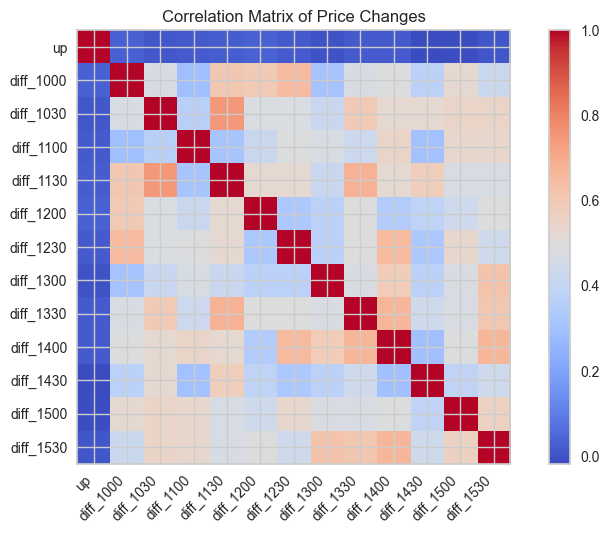

In [80]:


pd.set_option('display.float_format', lambda x: '%.6f' % x)
temp_df.tail(20)

# Create list of hour columns
hour_columns = [f'hour_{half_hour}' for half_hour in trading_half_hours]

# remove all non-hourly columns (except up - move it to the end)
df = temp_df[hour_columns + ['up']]

# add a column for whether each hour increased from previous hour
for i in range(1, len(trading_half_hours)):
    curr_hour = trading_half_hours[i]
    prev_hour = trading_half_hours[i-1]
    df[f'diff_{curr_hour}'] = df[f'hour_{curr_hour}'] > df[f'hour_{prev_hour}']

# remove all the hour_ columns
df = df[df.columns.drop(list(df.filter(regex='hour_')))]

# correlation matrix between all the diff columns and up
corr_matrix = df.corr()

# plot the correlation matrix
plt.figure(figsize=(8, 5.5))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

# Add labels
plt.title('Correlation Matrix of Price Changes')
plt.xticks(range(len(df.columns)), df.columns, rotation=45, ha='right')
plt.yticks(range(len(df.columns)), df.columns)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

In [83]:
df.tail(970)

,up,diff_1000,diff_1030,diff_1100,diff_1130,diff_1200,diff_1230,diff_1300,diff_1330,diff_1400,diff_1430,diff_1500,diff_1530
Date,,,,,,,,,,,,,
2021-01-21 00:00:00-05:00,True,False,False,False,False,False,False,False,False,False,False,False,False
2021-01-22 00:00:00-05:00,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-01-25 00:00:00-05:00,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-01-26 00:00:00-05:00,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-01-27 00:00:00-05:00,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-20 00:00:00-05:00,False,False,False,True,False,True,False,False,False,False,False,True,True
2024-11-21 00:00:00-05:00,True,False,False,True,True,False,True,True,True,True,False,False,True
2024-11-22 00:00:00-05:00,True,True,False,True,False,True,True,True,True,False,False,True,False
